# Logistic Regression
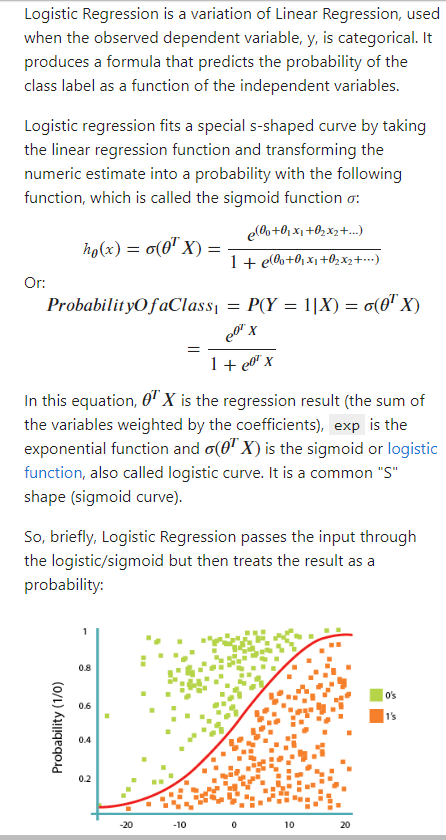

In [15]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [3]:
data=pd.read_csv('datasets/ChurnData.csv')
data

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [5]:
churn_df = data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

C:\Users\Anonymous\AppData\Local\Temp\ipykernel_15336\2141169409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df['churn'] = churn_df['churn'].astype('int')


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [6]:
churn_df.shape

(200, 10)

In [9]:
x=churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ']]
y=churn_df['churn']

In [11]:
x=preprocessing.StandardScaler().fit(x).transform(x)
x

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635],
       ...,
       [-1.36680743, -0.7026181 , -0.16283445, -0.21957866, -1.42318853,
        -0.02518185],
       [-0.53296457, -0.85594447, -1.14970993, -0.39130744,  0.91629947,
        -0.58477841],
       [ 1.18104577,  0.67731925,  0.42929083,  0.89665839, -0.6433592 ,
         1.31784991]])

# Test/Train split

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=4)
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((160, 6), (160,), (40, 6), (40,))

# modeling

In [17]:
lr=LogisticRegression(C=0.01,solver='liblinear')
lr.fit(xtrain,ytrain)

LogisticRegression(C=0.01, solver='liblinear')

In [19]:
yhat=lr.predict(xtest)
yhat

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0])

In [20]:
yhat_prob=lr.predict_proba(xtest)
yhat_prob

array([[0.58331258, 0.41668742],
       [0.57963473, 0.42036527],
       [0.53507038, 0.46492962],
       [0.60265031, 0.39734969],
       [0.53205212, 0.46794788],
       [0.52561365, 0.47438635],
       [0.48048743, 0.51951257],
       [0.57970225, 0.42029775],
       [0.44826879, 0.55173121],
       [0.60496815, 0.39503185],
       [0.62252917, 0.37747083],
       [0.6766781 , 0.3233219 ],
       [0.44097083, 0.55902917],
       [0.46520438, 0.53479562],
       [0.64022215, 0.35977785],
       [0.6058683 , 0.3941317 ],
       [0.55827088, 0.44172912],
       [0.52553823, 0.47446177],
       [0.5302539 , 0.4697461 ],
       [0.48232167, 0.51767833],
       [0.58727376, 0.41272624],
       [0.57510453, 0.42489547],
       [0.61120869, 0.38879131],
       [0.56683212, 0.43316788],
       [0.5552398 , 0.4447602 ],
       [0.68094546, 0.31905454],
       [0.60397399, 0.39602601],
       [0.57198058, 0.42801942],
       [0.47884081, 0.52115919],
       [0.68771892, 0.31228108],
       [0.

# Evaluation 
- Jaccard index
- confusion matrics

In [28]:
from sklearn.metrics import jaccard_score
jaccard_score(ytest,yhat,pos_label=0)


0.696969696969697

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(ytest, yhat, labels=[1,0]))

[[ 7  8]
 [ 2 23]]


Confusion matrix, without normalization
[[ 7  8]
 [ 2 23]]


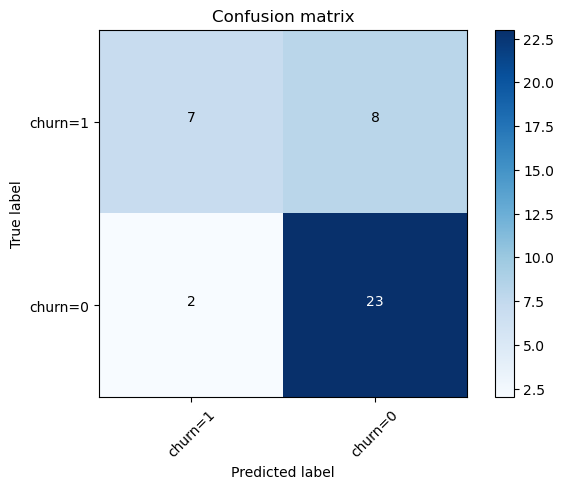

In [34]:
cnf_matrix = confusion_matrix(ytest, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [35]:
classification_report(ytest,yhat)

'              precision    recall  f1-score   support\n\n           0       0.74      0.92      0.82        25\n           1       0.78      0.47      0.58        15\n\n    accuracy                           0.75        40\n   macro avg       0.76      0.69      0.70        40\nweighted avg       0.76      0.75      0.73        40\n'

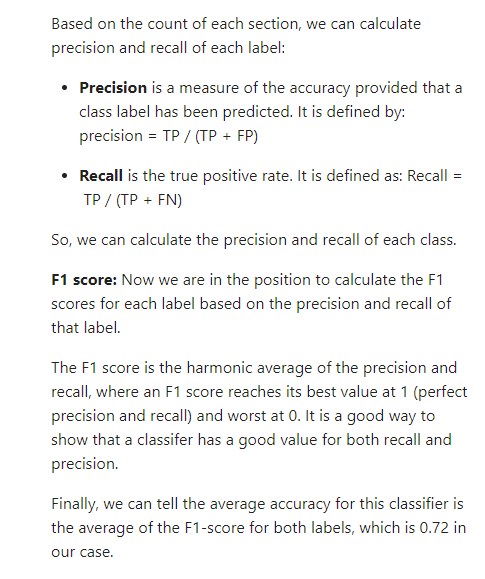

# log loss

In [36]:
from sklearn.metrics import log_loss
log_loss(ytest, yhat_prob)

0.5898732233414782

In [37]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(xtrain,ytrain)
yhat_prob2 = LR2.predict_proba(xtest)
print ("LogLoss: : %.2f" % log_loss(ytest, yhat_prob2))

LogLoss: : 0.60
